In [1]:
import sys
sys.path.append('..')
from pyclk import Module, List, In, Out, Reg, Trace

In [2]:
class counter(Module):
    def __init__(self):
        self.i_rst = In()
        self.o_cnt = Out()
        self.r_cnt = Reg()
    def logic(self):
        # logic goes here
        if self.i_rst == 1:
            self.r_cnt = 0
        else:
            self.r_cnt = self.r_cnt.q + 1
        self.o_cnt = self.r_cnt.q

class toplevel(Module):
    def __init__(self):
        # declare signals, registers, I/Os
        # instanciate sub-modules and make connections
        self.i_rst = List()
        self.o_cnt = List()
        self.u_counter = List()
        for i in range(2):
            self.i_rst[i] = In()
            self.o_cnt[i] = Out()
            self.u_counter[i] = _ = counter()
            _.i_rst(self.i_rst[i])
            _.o_cnt(self.o_cnt[i])
    def task(self): # a task can be hooked to the module
        while True:
            yield self.wait(2) # wait for 2 clock cycles
            print(f'Time is {self.time}')

In [3]:
u_toplevel = toplevel()

trace = Trace()
for i in range(2):
    trace.add(u_toplevel.i_rst[i])
    trace.add(u_toplevel.o_cnt[i])

u_toplevel.i_rst[0] = 1
u_toplevel.i_rst[1] = 1

u_toplevel.run(3, trace=trace)

u_toplevel.i_rst[0] = 0

u_toplevel.run(trace=trace)

u_toplevel.i_rst[1] = 0

u_toplevel.run(5, trace=trace)

trace.remove(u_toplevel.o_cnt[0])

u_toplevel.run(5, trace=trace)

trace.add(u_toplevel.o_cnt[0])

u_toplevel.run(5, trace=trace)

Time is 2
Time is 4
Time is 6
Time is 8
Time is 10
Time is 12
Time is 14
Time is 16
Time is 18


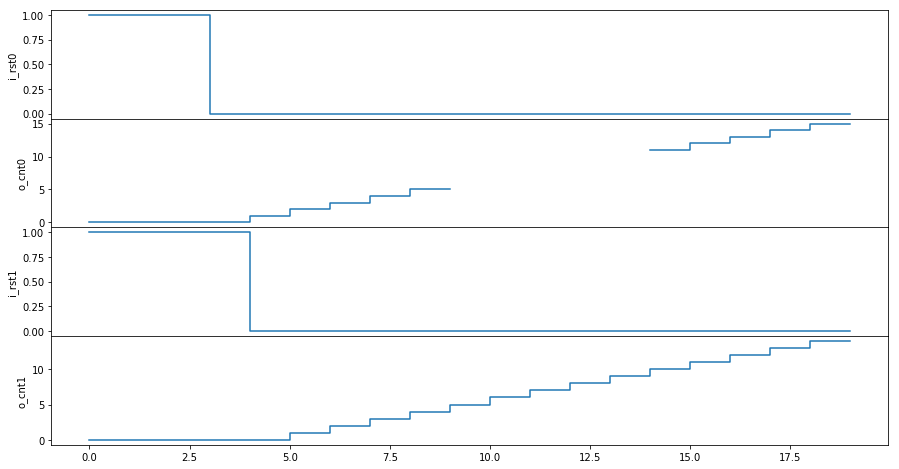

In [4]:
trace.plot()